# Code to be added to utils

## general utils

In [1]:
def remove_cats(adata):

    cat_columns = adata.obs.select_dtypes(['category']).columns
    adata.obs[cat_columns] = adata.obs[cat_columns].astype(str)
    
    return adata

## plotting utils

In [70]:
def tiss_cell_fractions(adata,
                        technology_col='method',
                        breakby='tissue',
                        category='cell_ontology_class',
                        dataset="Pilot2",
                        groupby = "donor"):
    
    
    import sys
    sys.path.append('/home/angela/sapiens/tabula-sapiens/')
    from utils.colorDict import donor_colors
    donors_color_dict = donor_colors()
    
    for m in set(adata.obs[technology_col]):
        adata_subset = adata[adata.obs[technology_col] == m].copy()
        adata_subset = remove_cats(adata_subset)
        for t in set(adata_subset.obs[breakby]):
            print(t)
            tiss = adata_subset[adata_subset.obs[breakby] == t].copy()
            tiss = remove_cats(tiss)

#             aux = tiss.obs.groupby([category,groupby]).count()
#             aux = pd.DataFrame(aux).reset_index()
#             aux['fraction'] = aux[aux.columns[1]]/aux[aux.columns[1]].sum()
#             aux['cell_number'] = aux[aux.columns[1]]
            aux = tiss.obs.groupby([category,groupby])['cell_id'].count()
            aux = pd.DataFrame(aux).reset_index()
            aux['fraction'] = aux['cell_id']/aux['cell_id'].sum()
            aux['cell_number'] = aux['cell_id']

#             aux[[category,'fraction','cell_number']].to_csv("./cell_fractions/"+dataset+"_"+m+"_"+t+'.csv')

            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'fraction',x = category, 
                            hue = groupby,palette=donors_color_dict,
                            ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel= dataset +" "+ t +' cell types', ylabel='Relative abundance in'+ m +' data');
            plt.tight_layout()
            plt.savefig("./cell_fractions/"+dataset+"_"+m+"_"+t+'.pdf')

In [71]:
pwd

'/home/angela/sapiens/tabula-sapiens/analysis-scripts/publication/v0'

# Setup

In [ ]:
%load_ext autoreload
%autoreload 2

In [3]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [ ]:
import sys
sys.path.append('/home/angela/src/scVI_TSP/')
sys.path.append('/home/angela/sapiens/tabula-sapiens/')
from utils.annotations_utils import *
from utils.colorDict import *
from utils.general_utils import *
# from utils.plotting_utils import *

# Read data

In [4]:
data_path = "/mnt/ibm_lg/angela/sapiens/data/sapiens_paper1/"

In [5]:
adata = sc.read_h5ad(data_path + "Pilot1_Pilot2.Final.h5ad")
adata = remove_cats(adata)
adata

AnnData object with n_obs × n_vars = 203513 × 58870
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode', 'n_counts', 'n_genes', 'batch', 'donor_tech_tissue', 'donor_tech', 'compartment', 'compartment_pred', 'propagated_cell_ontology_class', 'manual_cell_ontology_class'
    var: 'feature_types-0-0', 'n_cells-0-0', 'gene_symbol-0-0', 'n_cells-1-0', 'n_cells-0', 'feature_types-0-0-1', 'gene_symbol-0-0-1', 'n_cells-1-0-1', 'n_cells-1-1', 'n_cells', 'ensemble_id'
    uns: 'compartment_colors', 'compartment_pred_colors', 'donor_colors', 'donor_tech_colors', 'method_colors', 'neighbors', 'tissue_colors', 'umap'
    obsm: 'UMAP_donor_tech.100', 'UMAP_donor_tech.200', 'UMAP_donor_tech.50', 'X_scvi', 'X_scvi_donor_t

In [61]:
adata = sc.read_h5ad("/mnt/ibm_lg/angela/sapiens/data/Pilot1_Pilot2_filtered_ensembl_id_Aug5.complete_meta.raw.h5ad")
adata = remove_cats(adata)
adata

AnnData object with n_obs × n_vars = 207016 × 2740
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'donor', '10X_replicate', 'sequencer', 'sex', 'tissue', 'smartseq2_well_seq', 'notes', 'smartseq2_sorted_population', '10X_sample', 'anatomical_position', '10X_barcode', 'n_counts', 'n_genes', 'manual_cell_ontology_class', 'manual_annotation', 'doublet_filter', 'compartment', 'batch', 'compartment_pred', 'leiden', 'cluster_id', 'Propagated Annotation', 'Entropy All Methods', 'Entropy kNN Reps', 'Entropy scANVI Reps', 'Entropy SVM Reps', 'Potential Doublets', 'Onclass', 'singlecellNet', 'kNN', 'SVM', 'scANVI', 'compartment_pred_svm', 'manual_cell_ontology_classcollapsed', 'Propagated Annotationcollapsed', 'Onclasscollapsed', 'singlecellNetcollapsed', 'kNNcollapsed', 'SVMcollapsed', 'scANVIcollapsed', 'miscompartmentalized', 'log_n_counts', 'log_n_genes'
    var: 'feature_

# Generate figures -- to be replaced by function

In [ ]:
for p in [tsp1,tsp2]:
    
    p = p[p.obs['method']=='10X'].copy()
    
    for t in list(set(p.obs['tissue'])):
        print(t)
        tiss = p[p.obs['tissue'] == t].copy()
        
        try:
            
            aux = tiss.obs.groupby(['scANVI Prediction By Organ'])['sample'].count()
            aux = pd.DataFrame(aux).reset_index()
            aux['sample'] = aux['sample']/aux['sample'].sum()
            
            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'sample',x = 'scANVI Prediction By Organ', ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel="Pilot1 "+t+' cell types', ylabel='Relative abundance in 10X data');
            plt.tight_layout()
            plt.savefig("./cell_fractions/Pilot1_"+t+'.pdf')
            

        except:
            aux = tiss.obs.groupby(['cell_ontology_class'])['sample'].count()
            aux = pd.DataFrame(aux).reset_index()
            aux['sample'] = aux['sample']/aux['sample'].sum()
            
            f, ax = plt.subplots(figsize=(15,10)) 
            g = sns.barplot(data = aux, y = 'sample',x = 'cell_ontology_class', ax = ax)
            ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
            ax.set(xlabel="Pilot2 "+t+' cell types', ylabel='Relative abundance in 10X data');
            plt.tight_layout()
            plt.savefig("./cell_fractions/Pilot2_"+t+'.pdf')

        
    

# Updating 

Bone_Marrow
Large_Intestine
Muscle
Thymus
Kidney
Skin
Lung
Blood
Vasculature
Trachea
Small_Intestine
Lymph_Node
Bladder
Spleen
Spleen
Bone_Marrow
Large_Intestine
Muscle
Thymus
Kidney
Skin
Lung


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Vasculature


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trachea


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Small_Intestine


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Lymph_Node


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Bladder


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Blood


/home/angela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


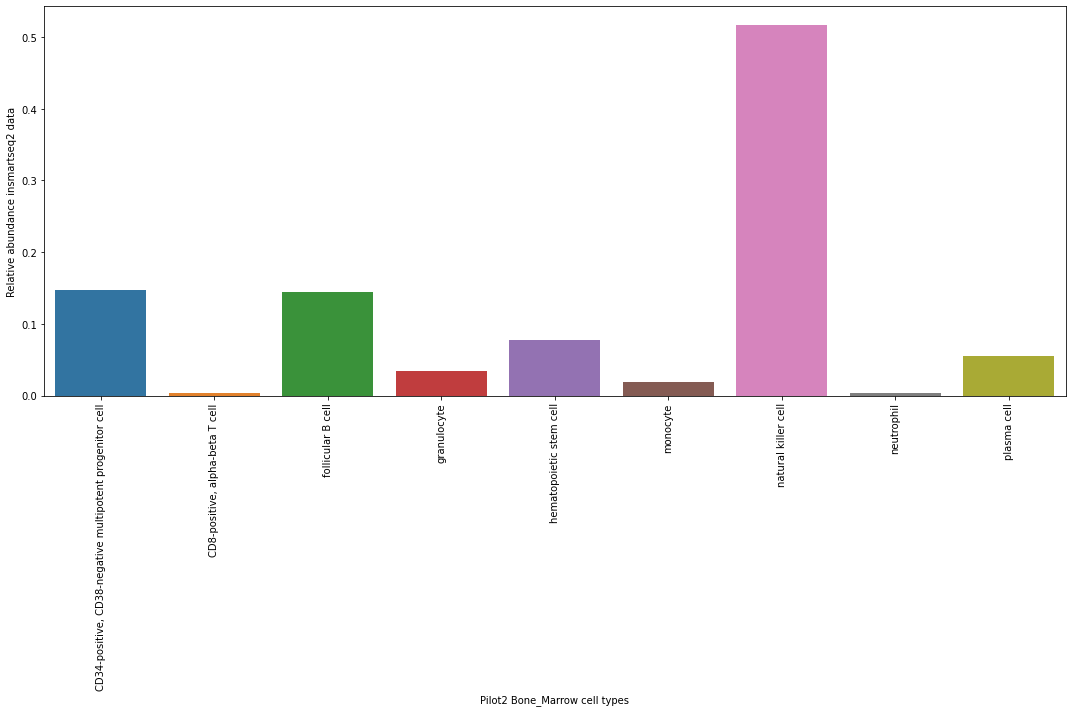

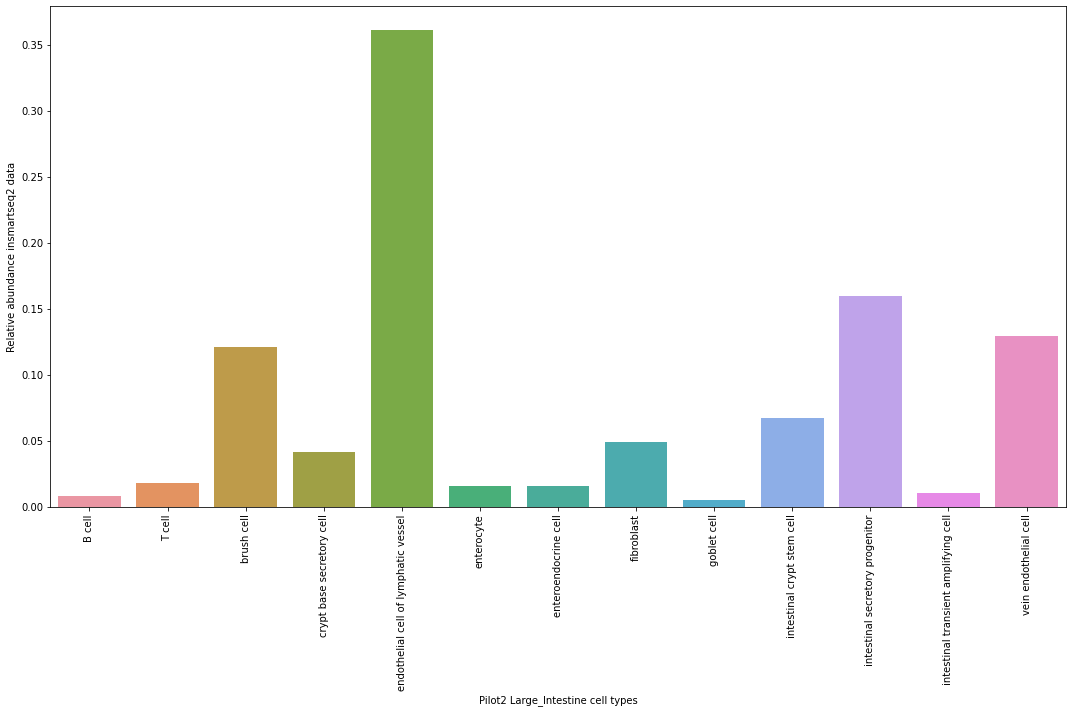

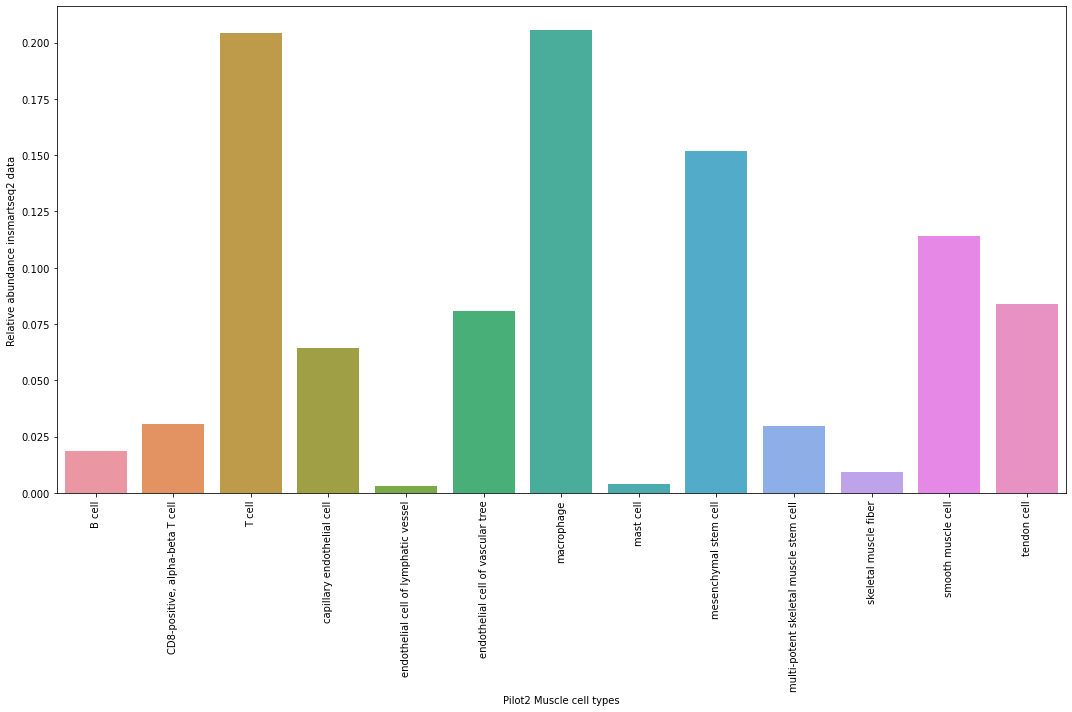

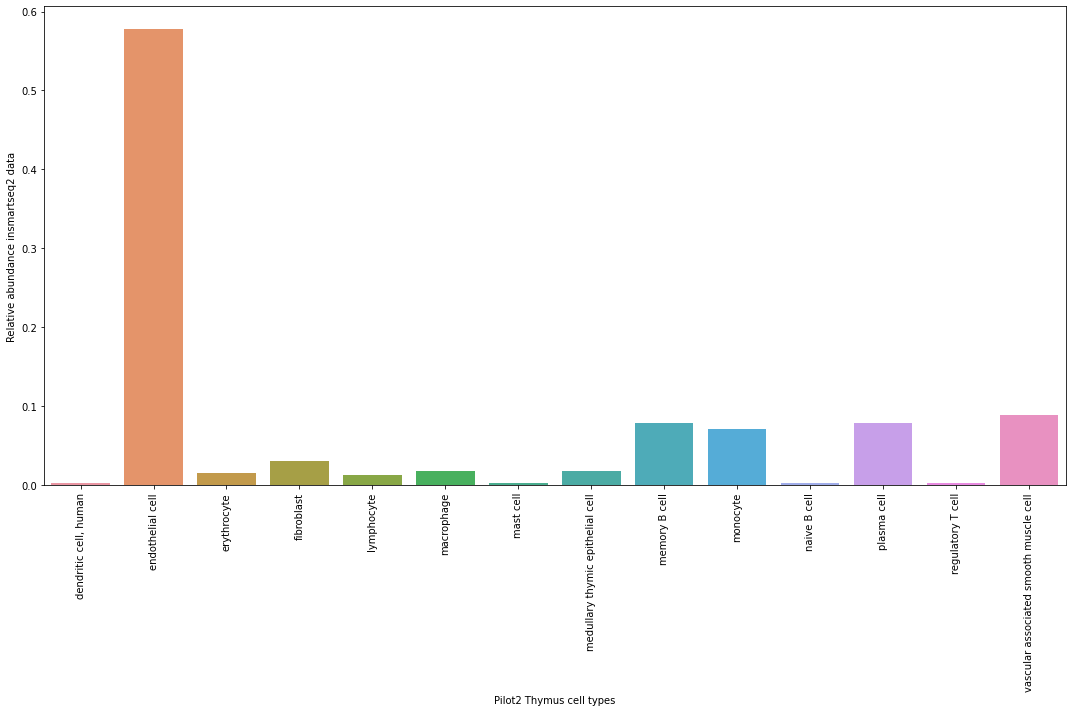

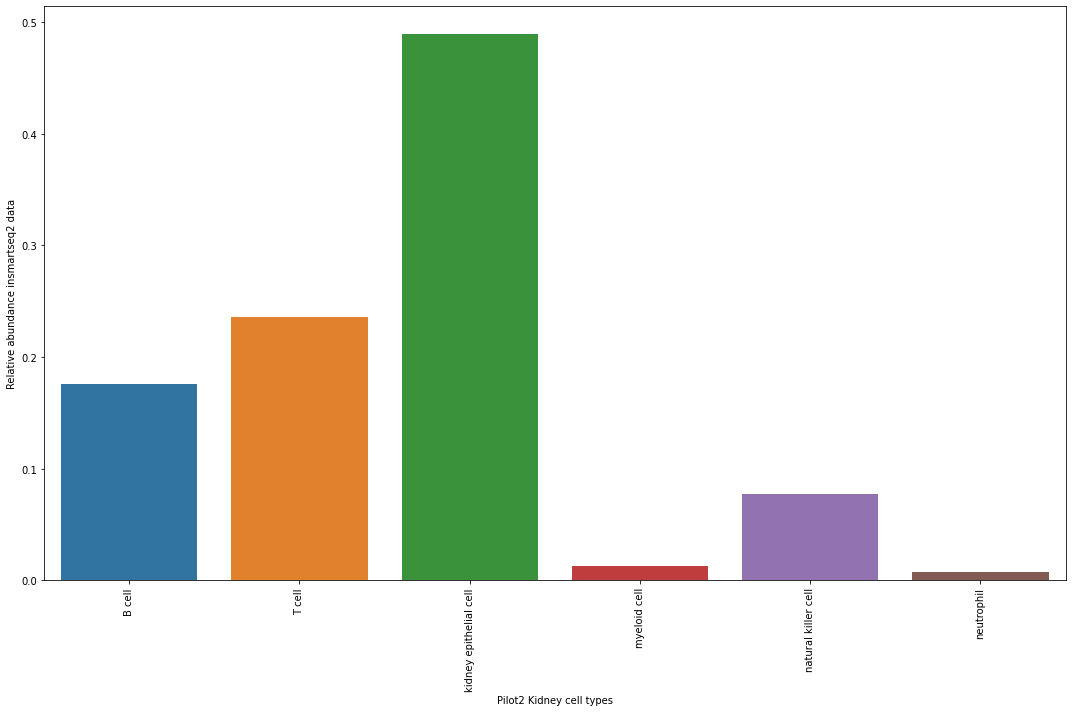

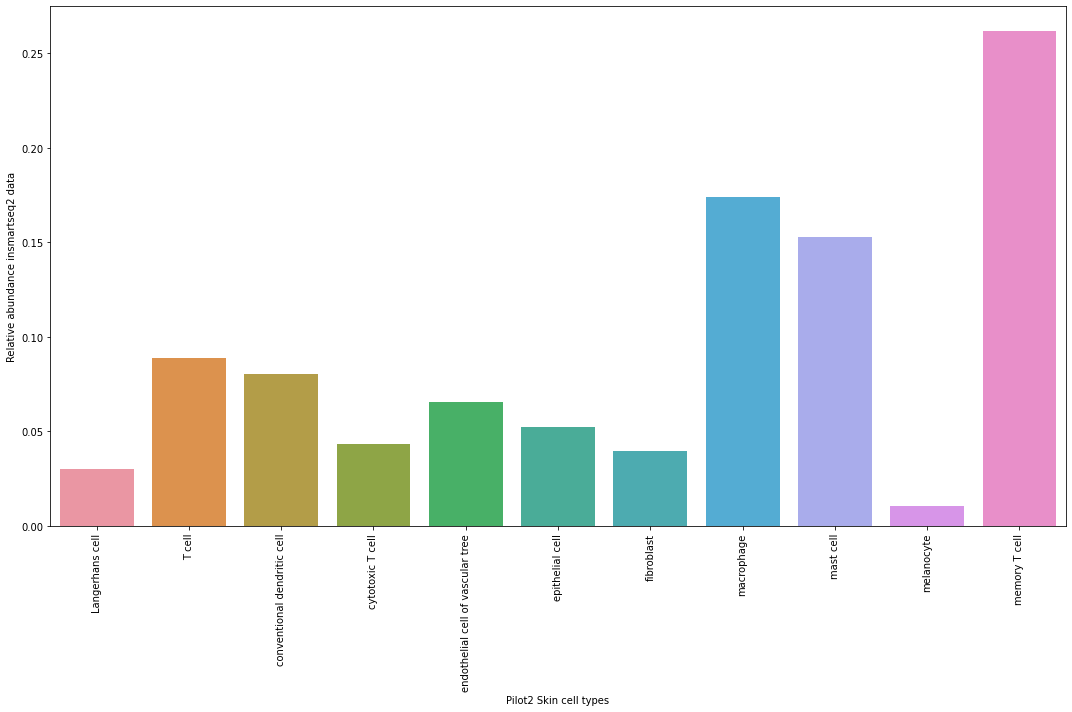

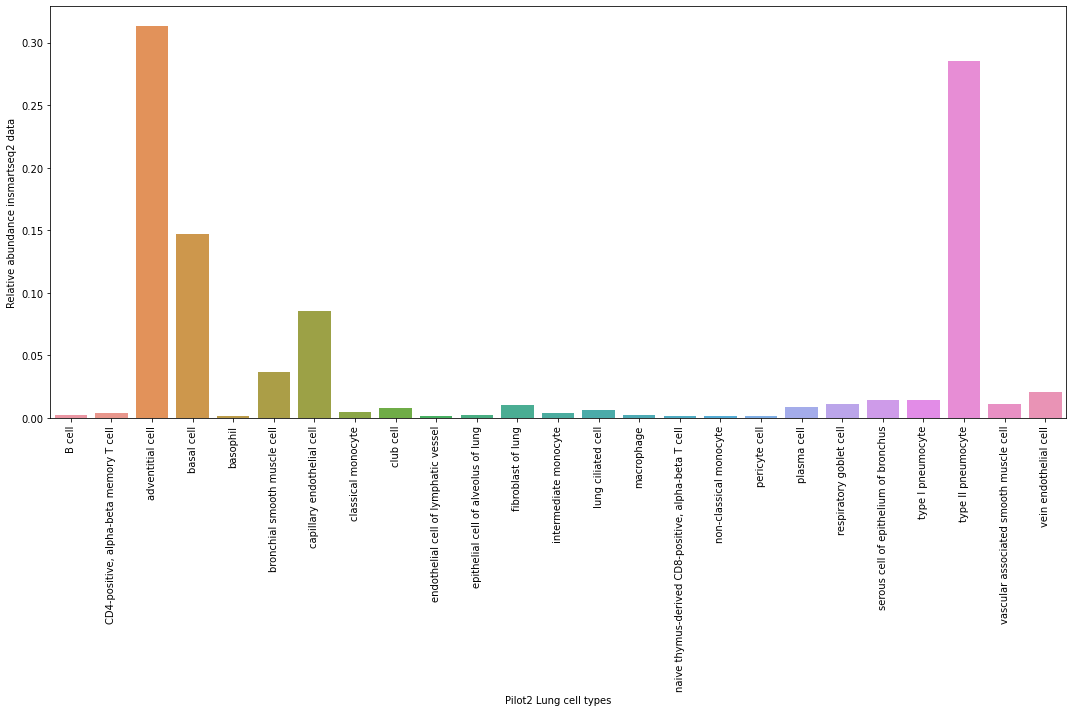

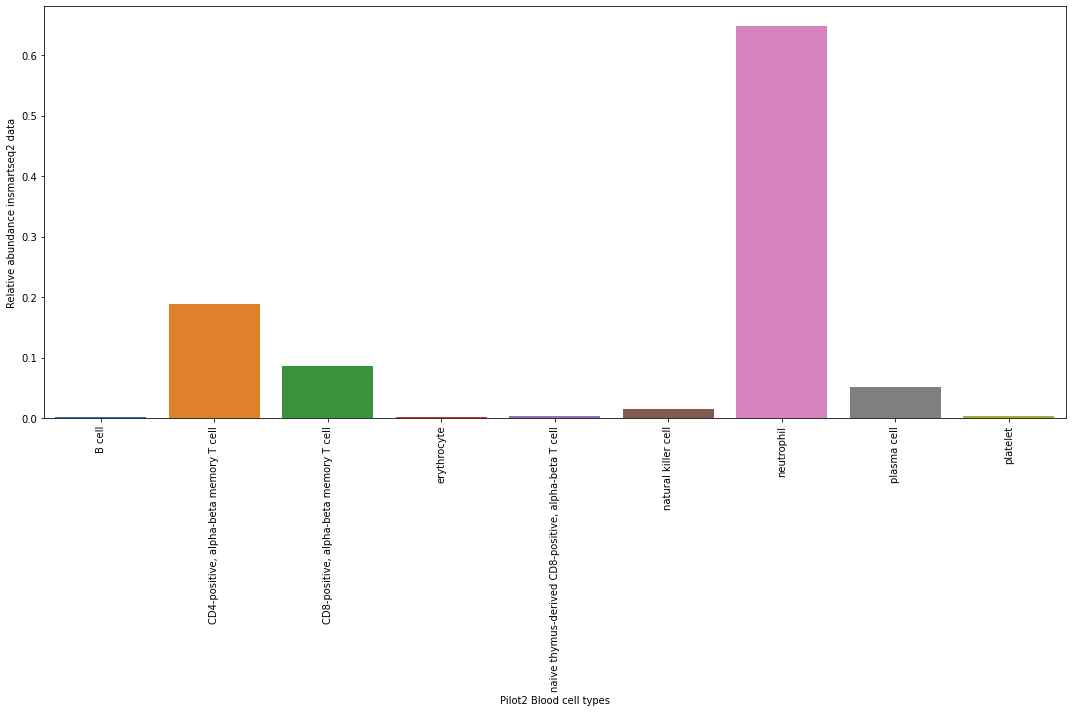

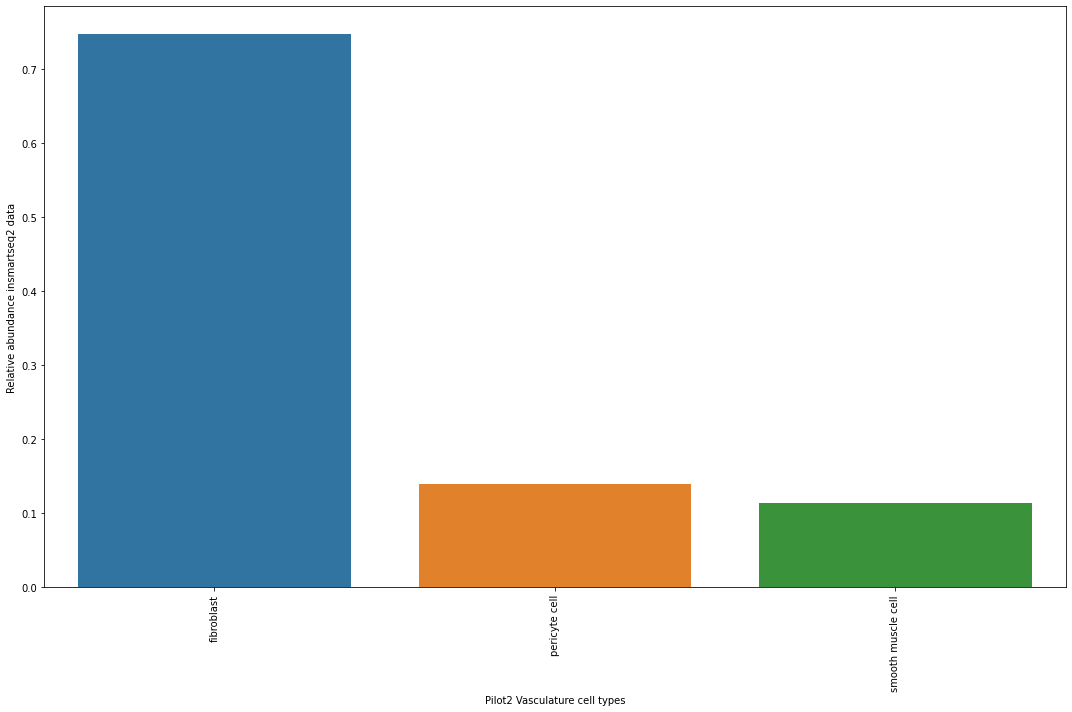

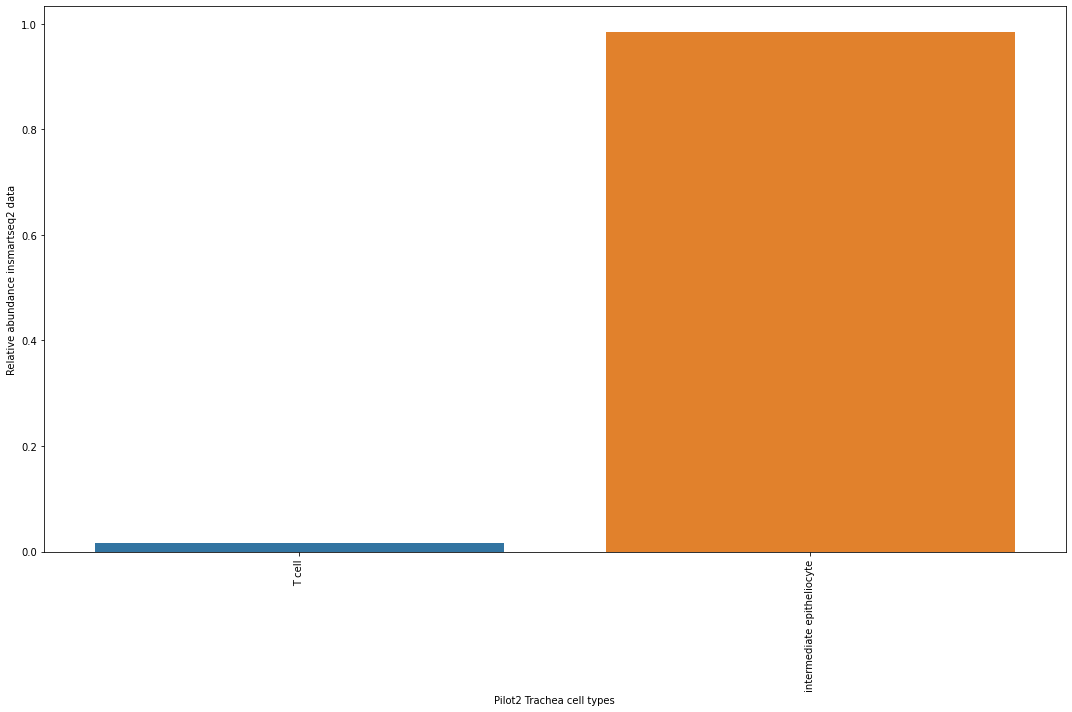

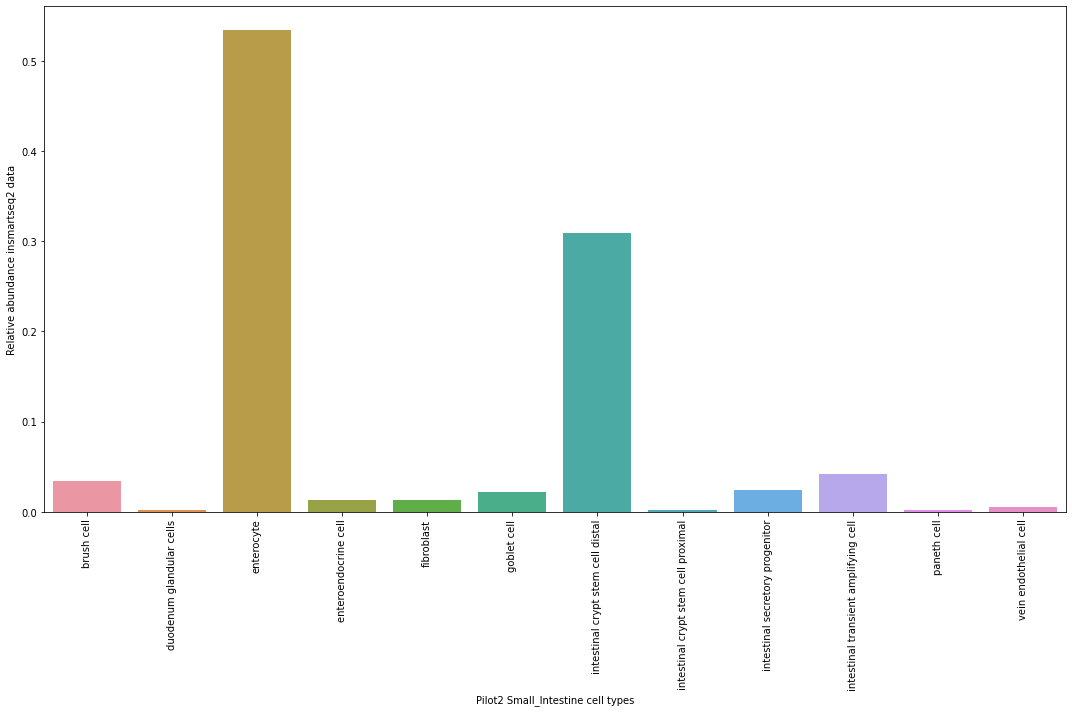

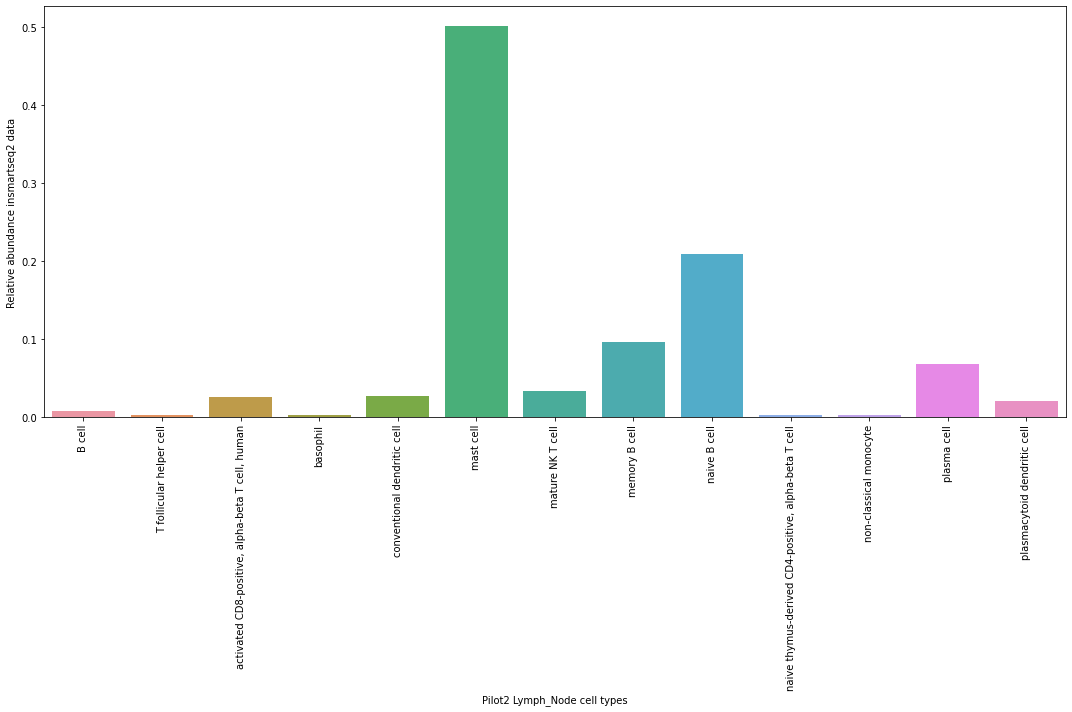

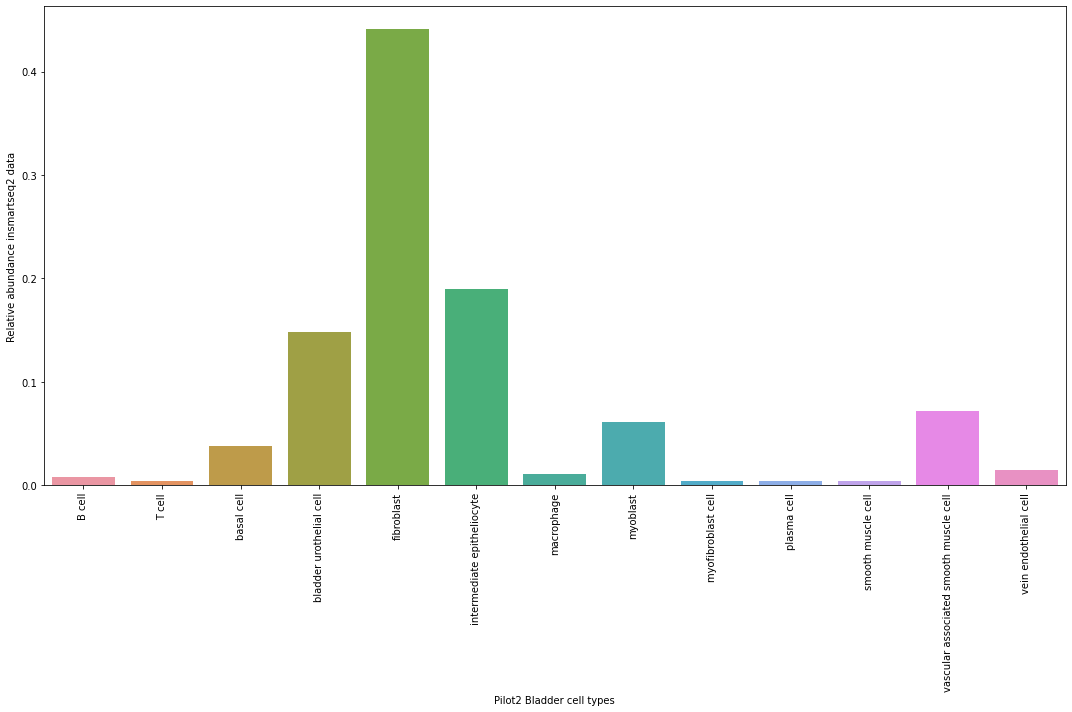

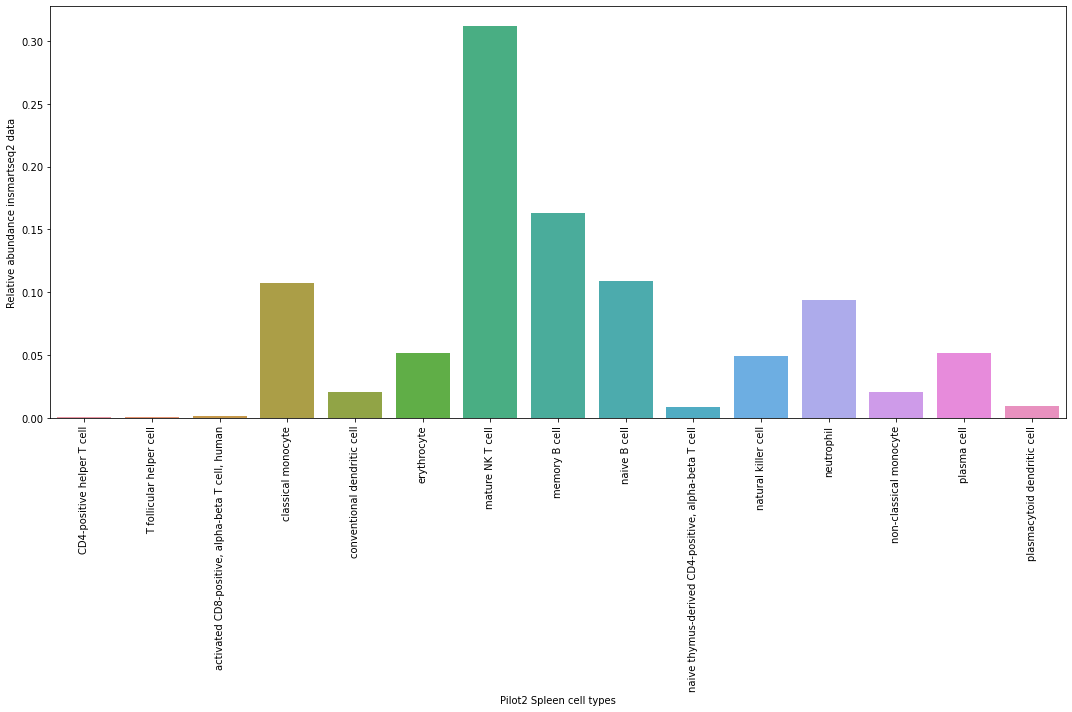

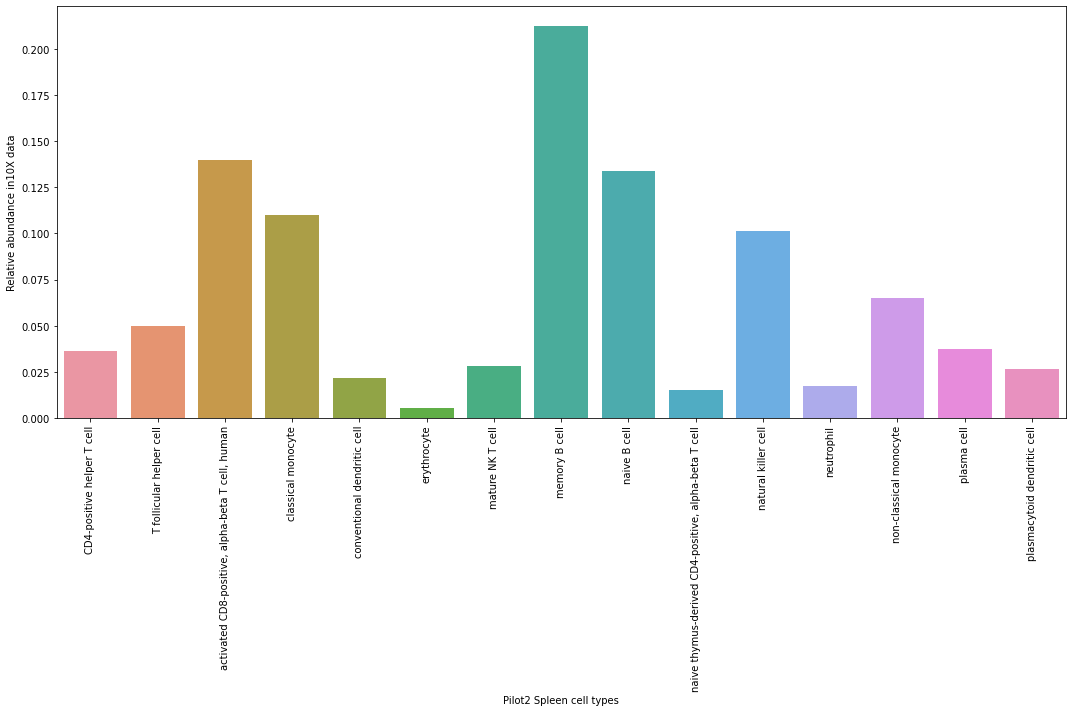

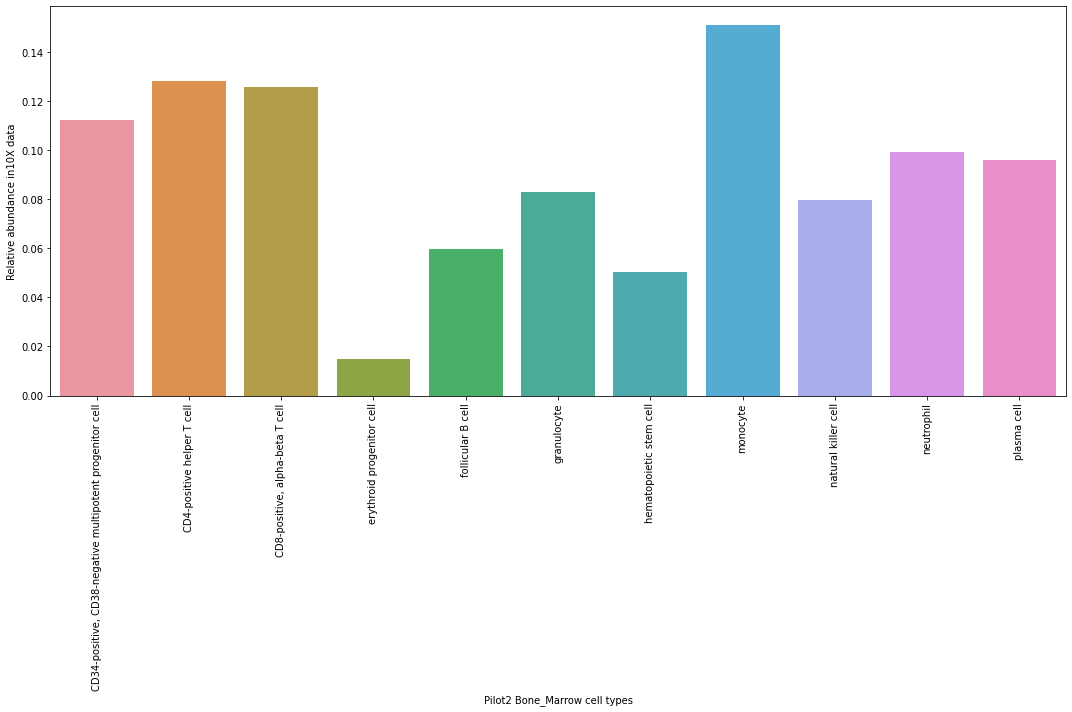

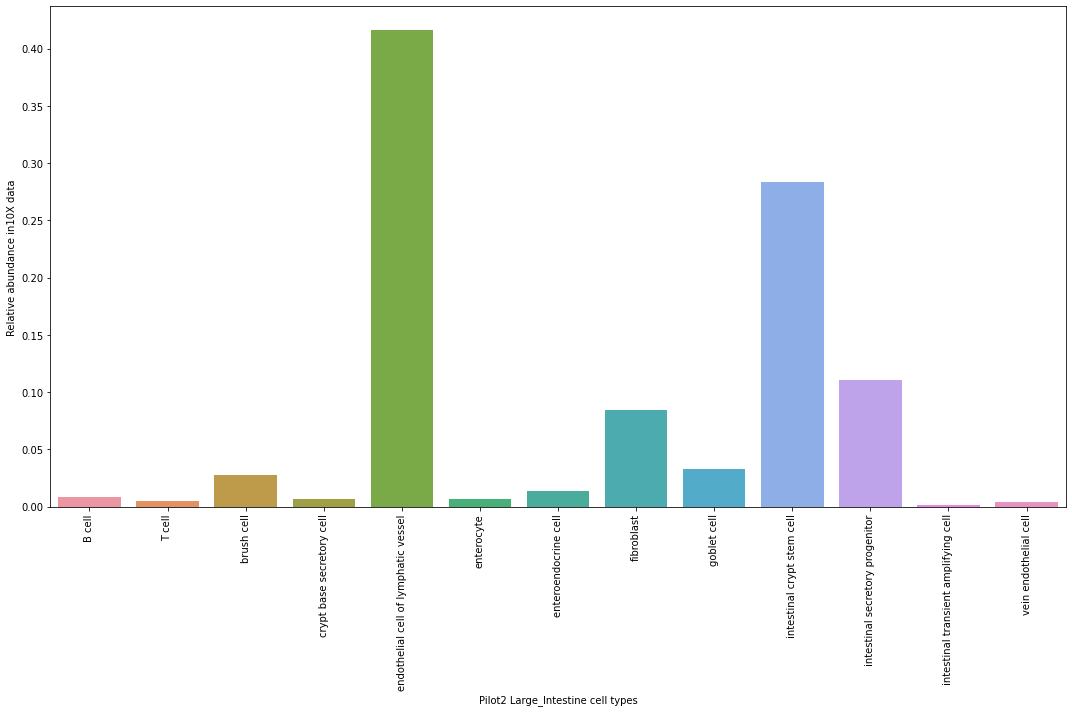

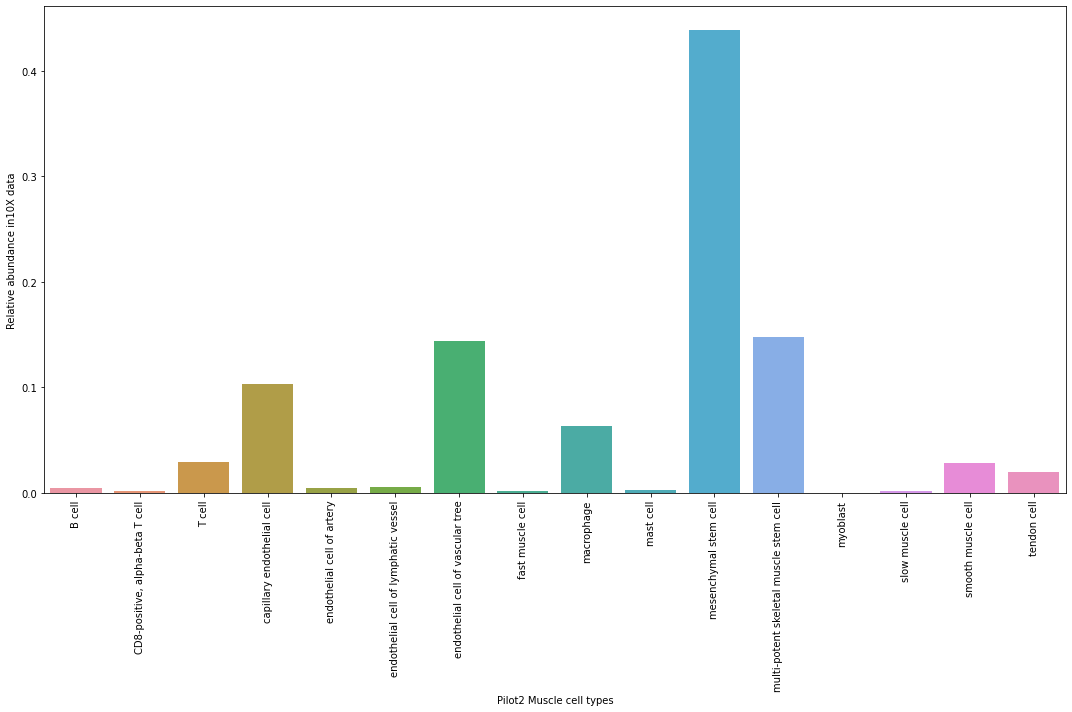

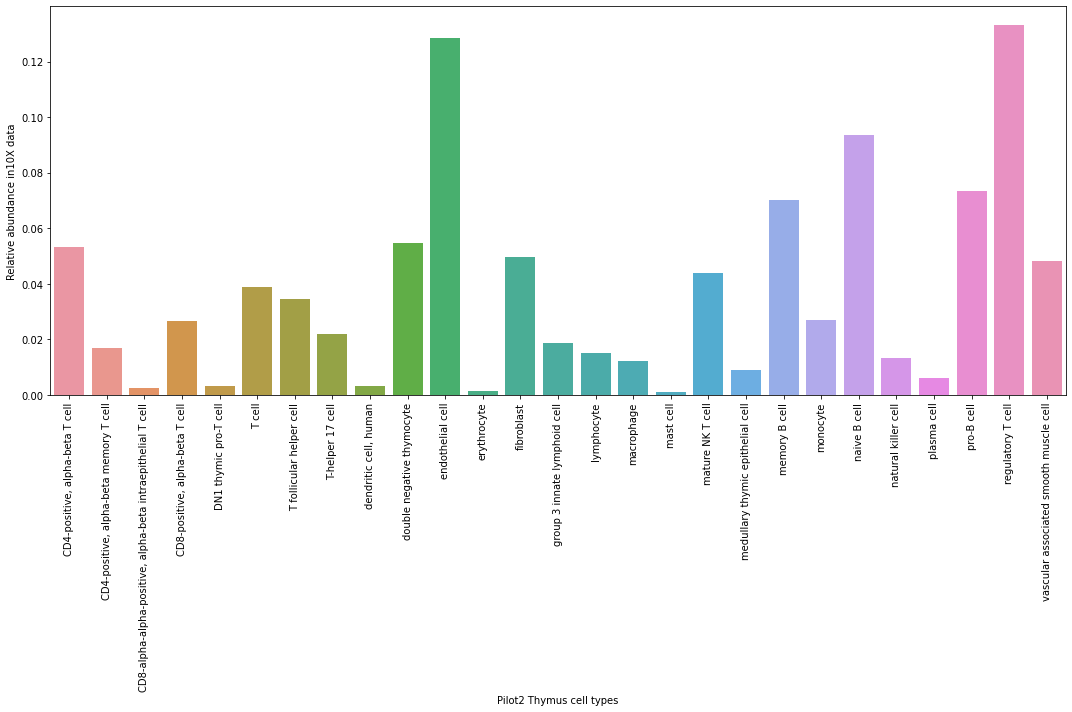

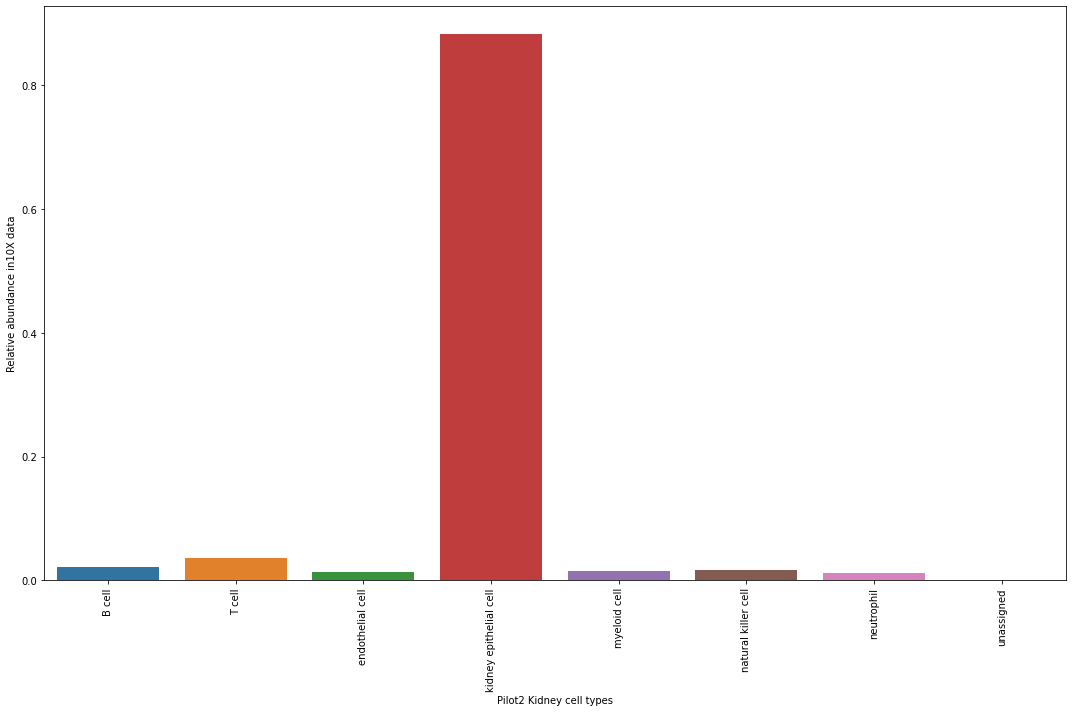

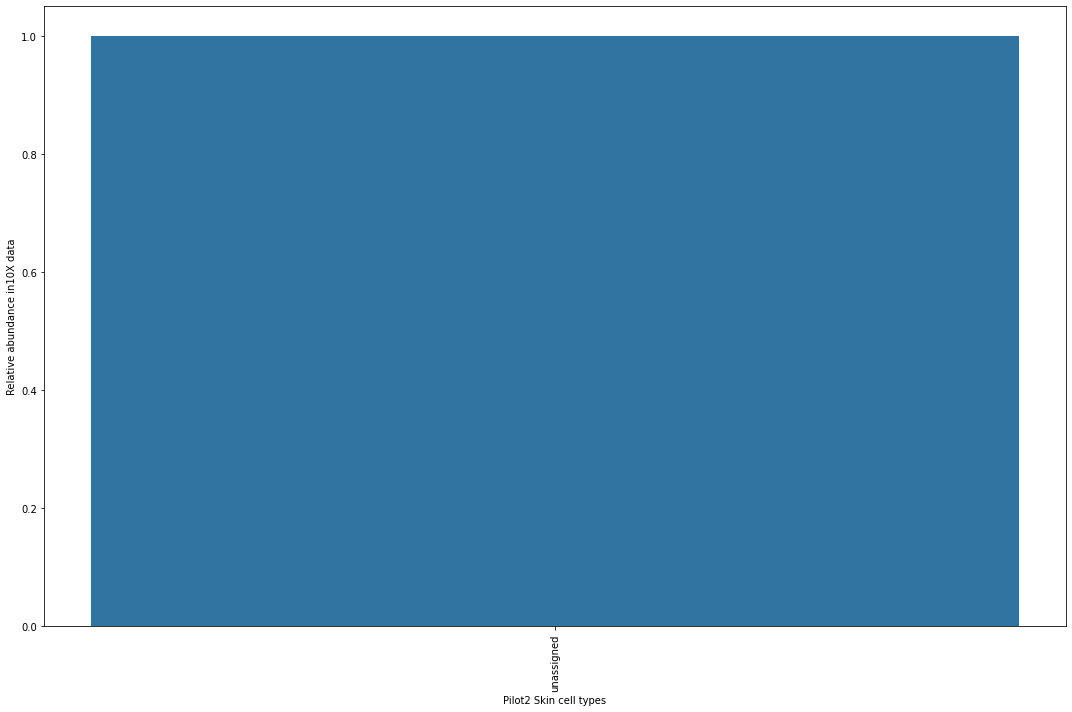

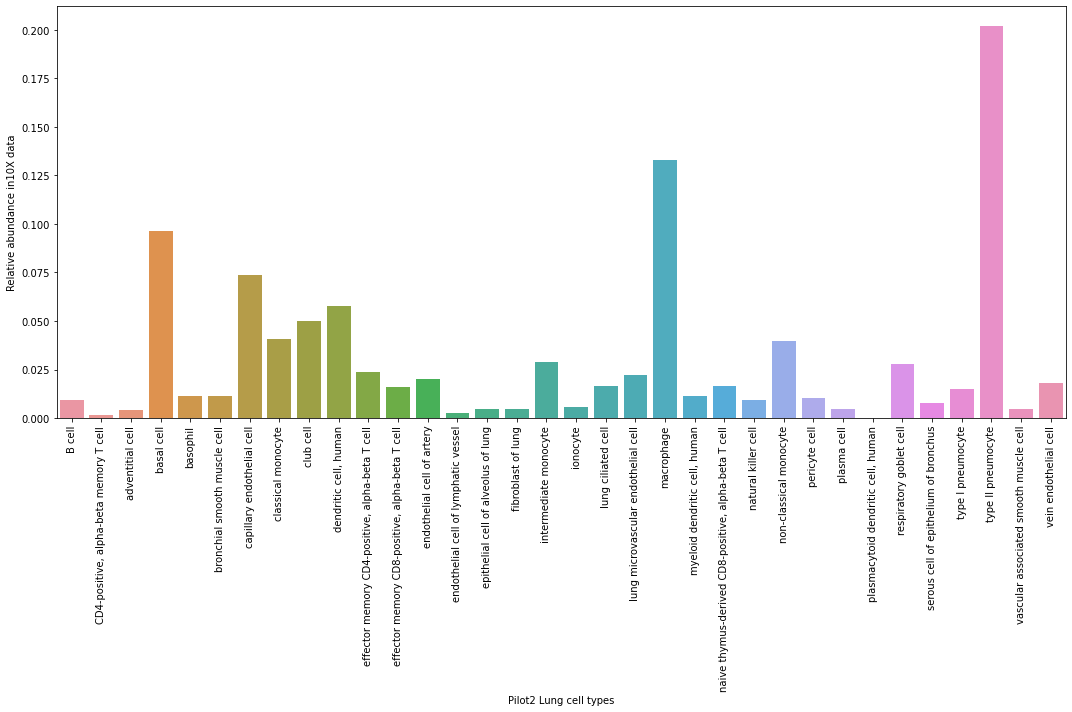

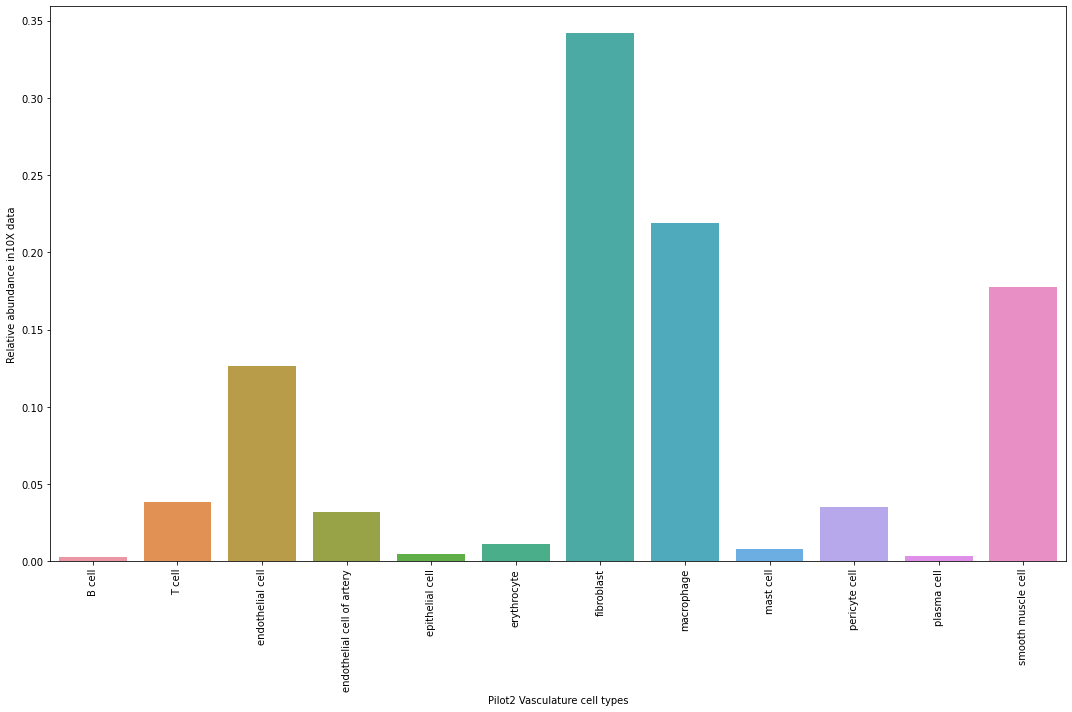

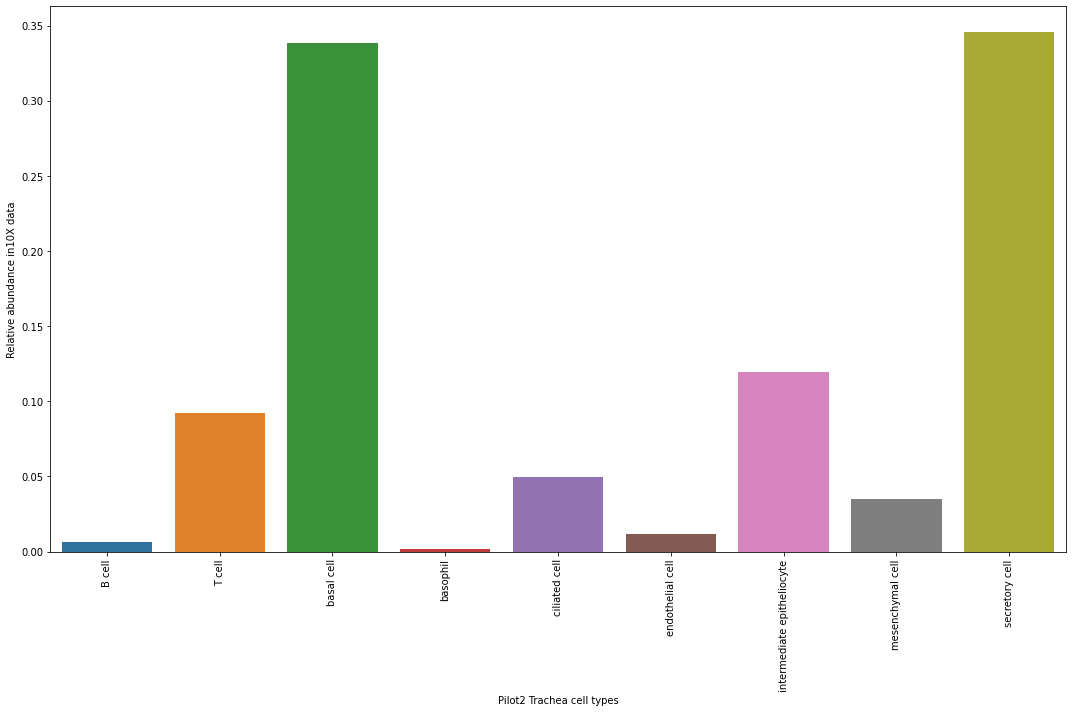

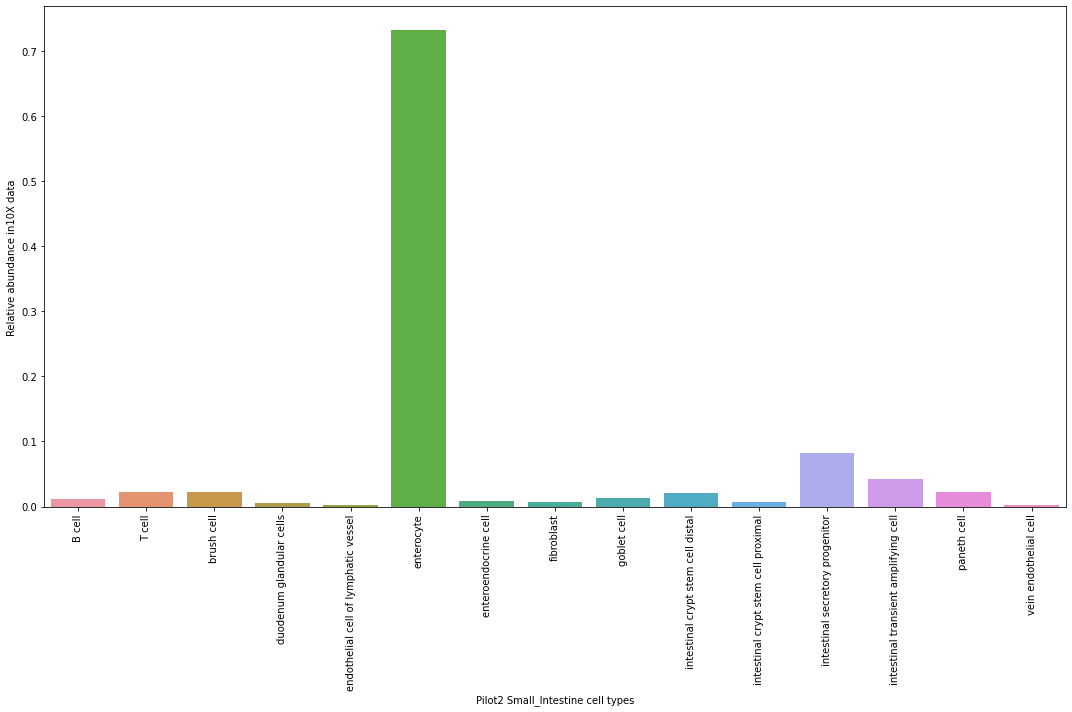

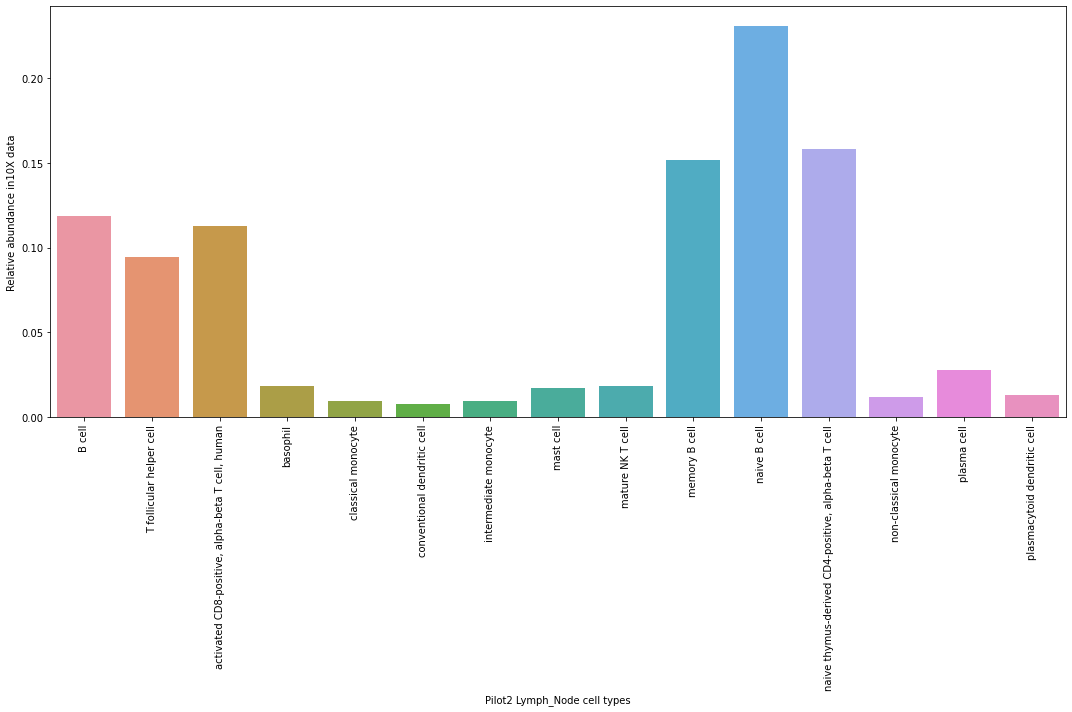

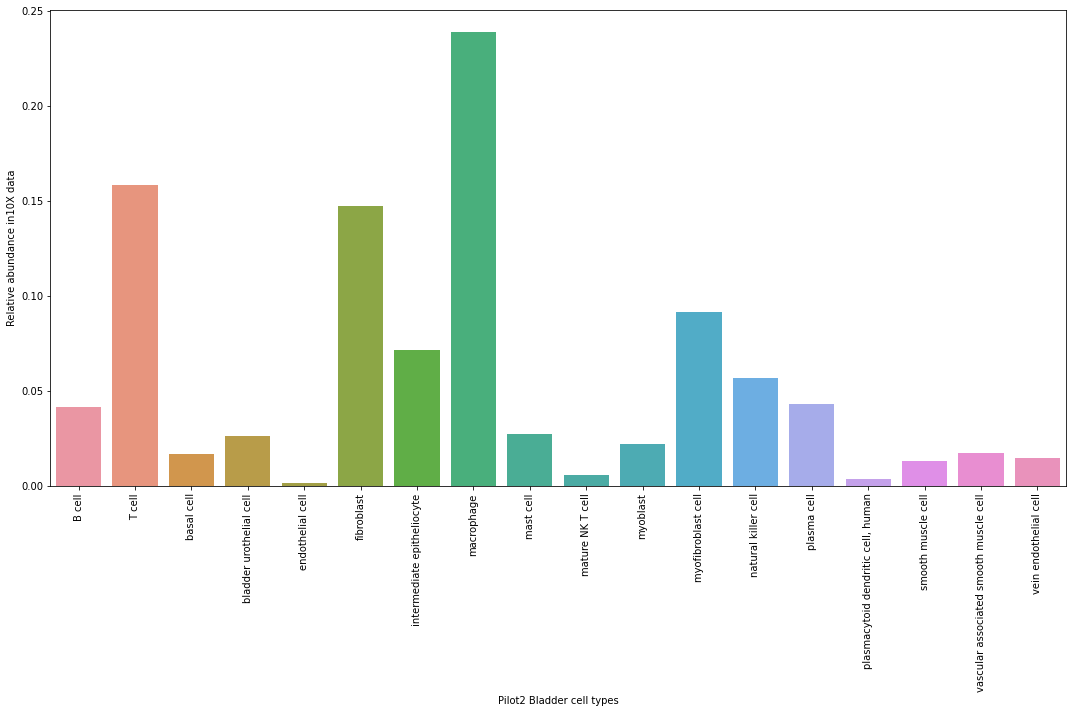

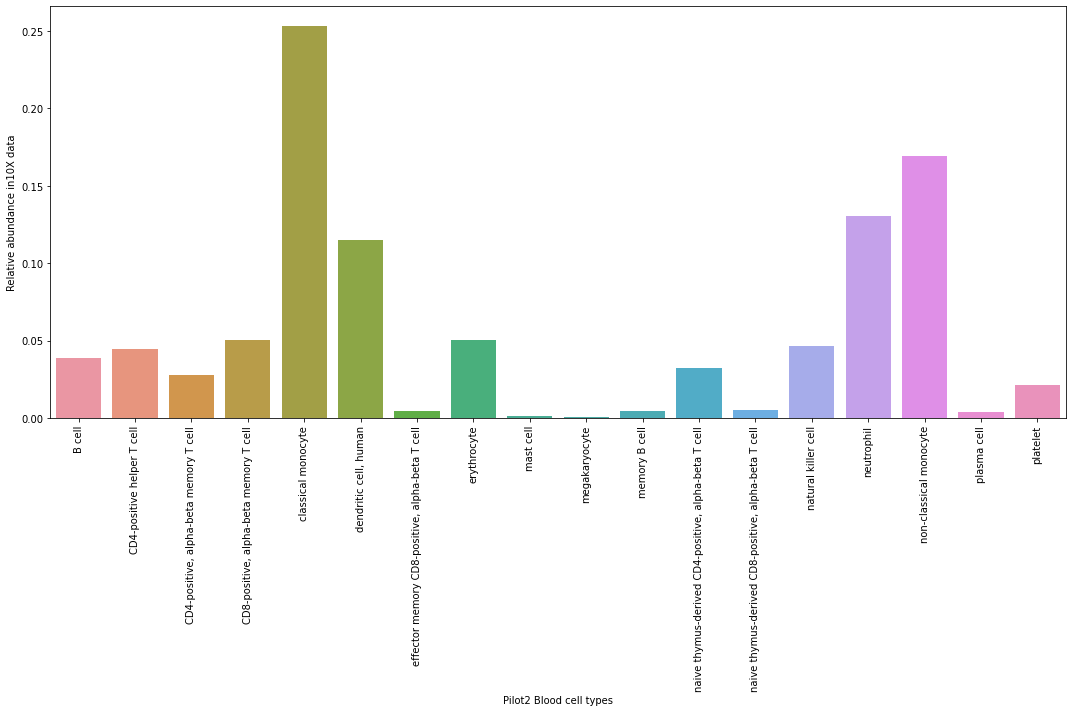

In [12]:
tiss_cell_fractions(adata[adata.obs['donor']=='TSP2'].copy(),
                        technology_col='method',
                        groupby='tissue',
                        category='propagated_cell_ontology_class',
                        dataset="Pilot2")

Muscle
Lung
Bladder
Blood
Pancreas
Muscle
Lung
Bladder
Blood
Pancreas


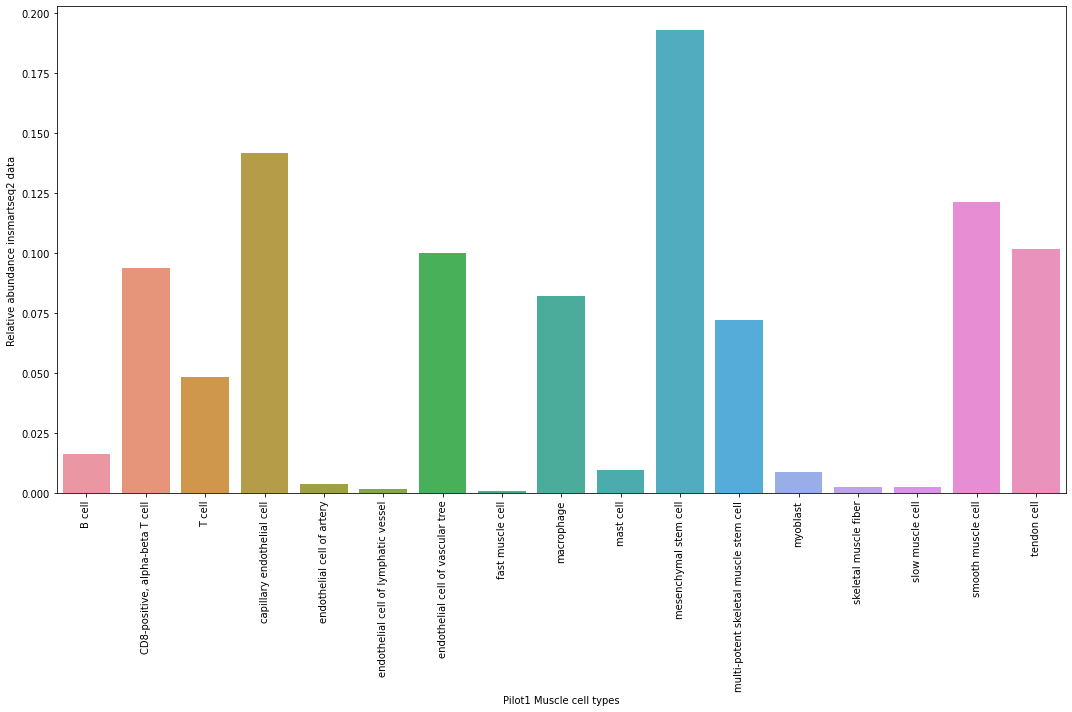

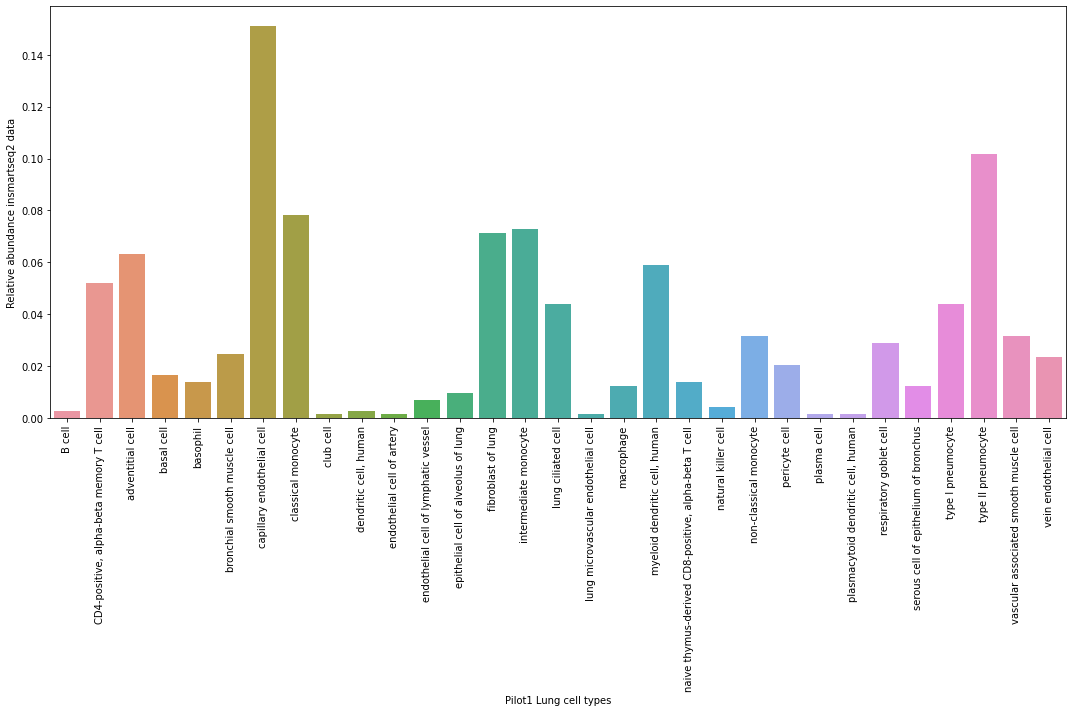

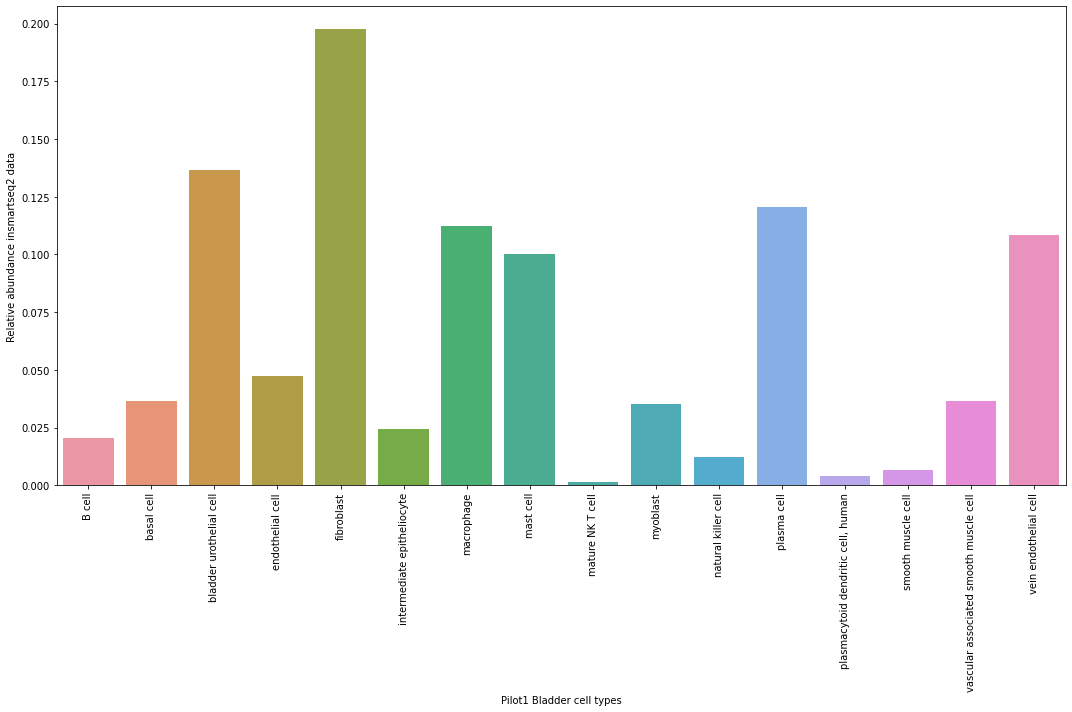

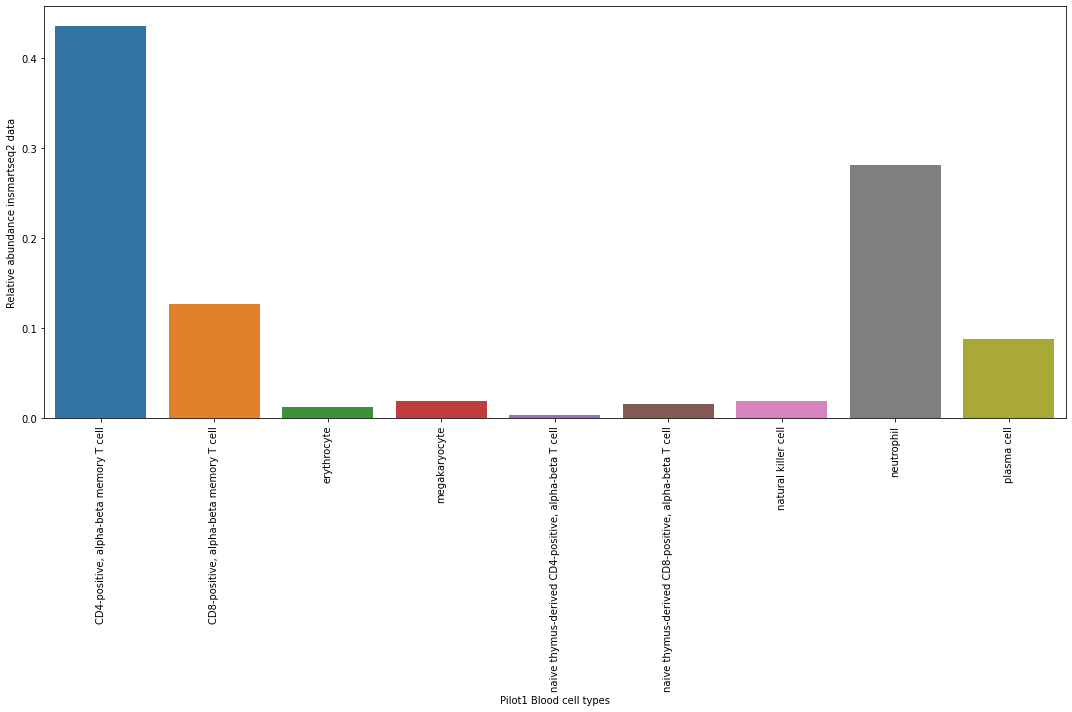

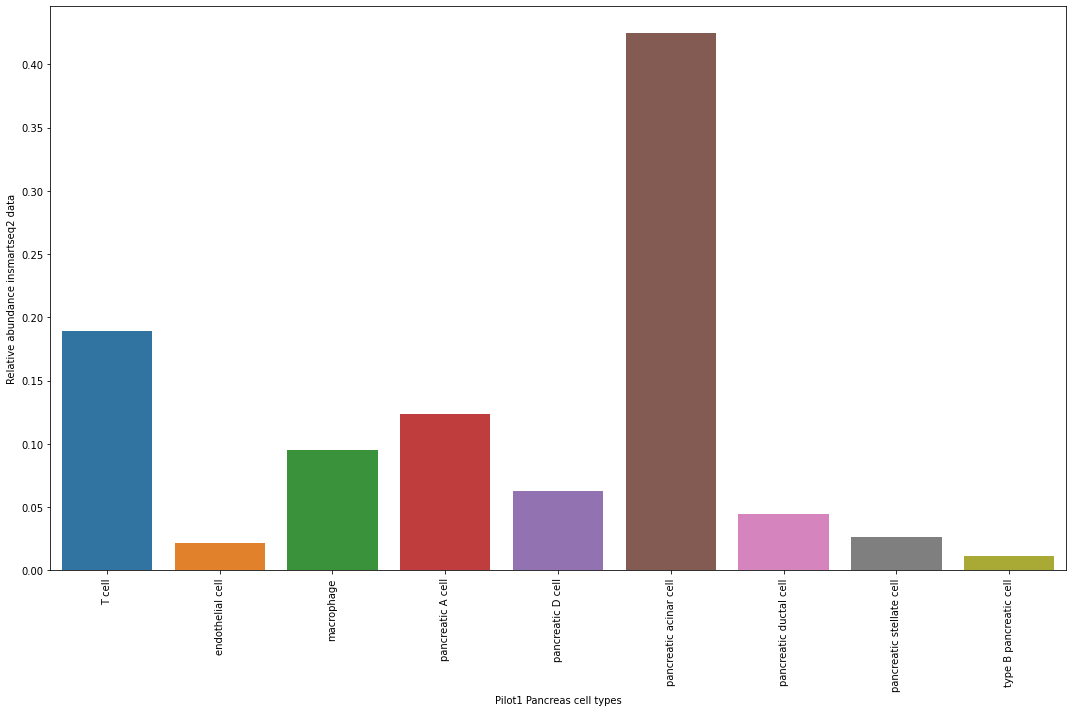

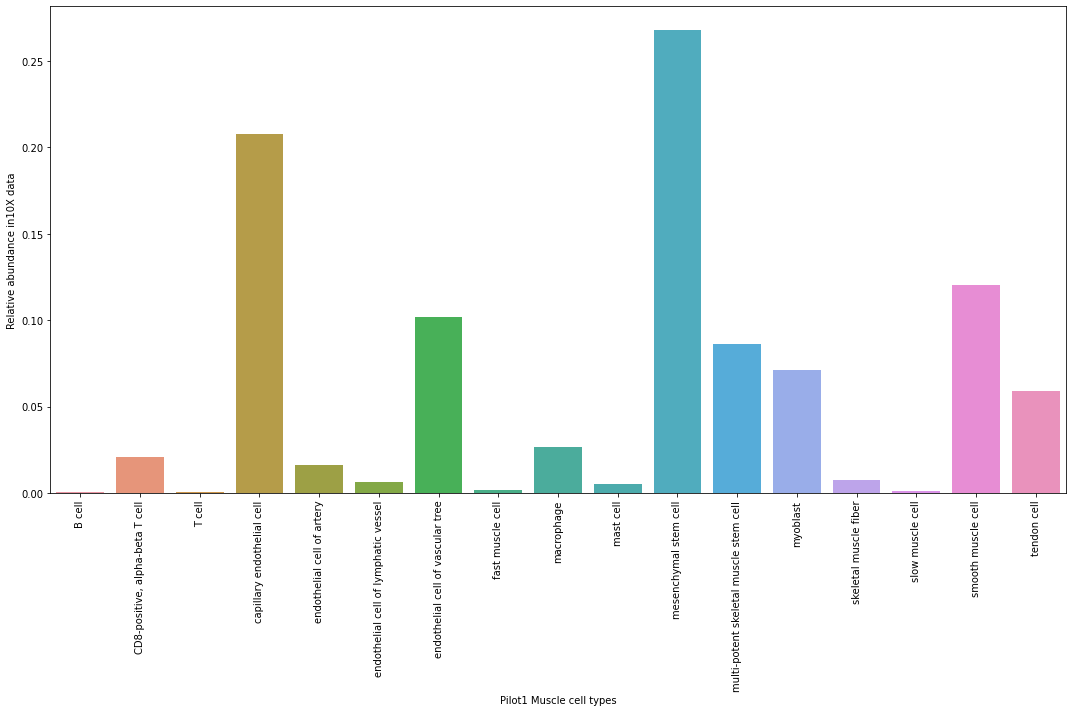

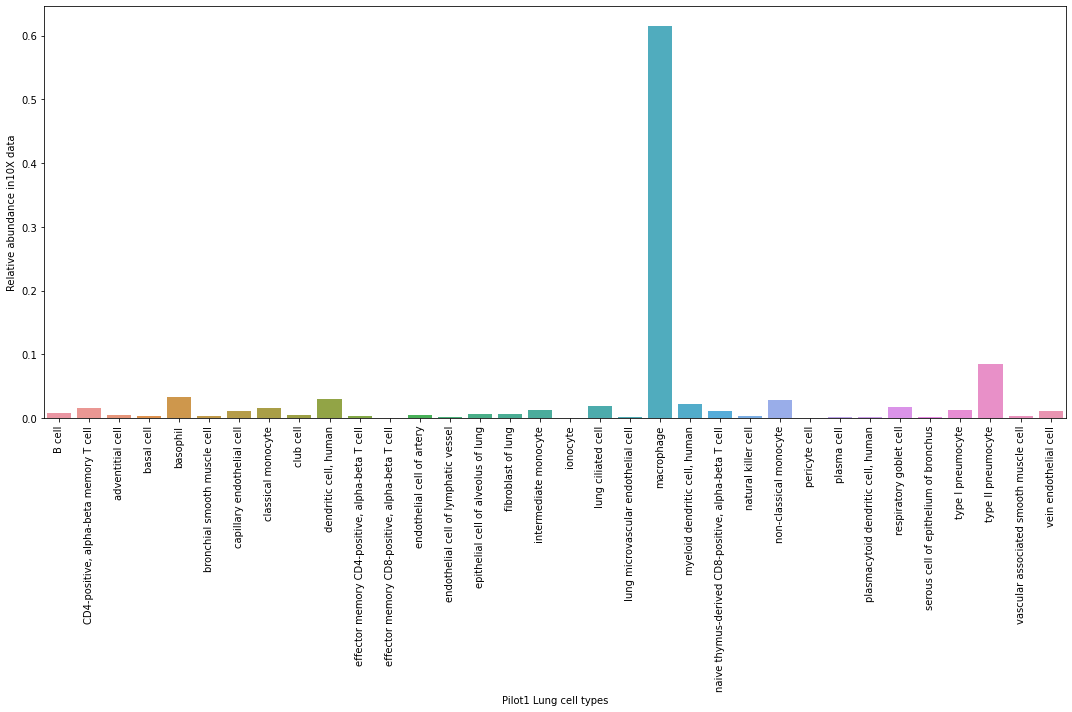

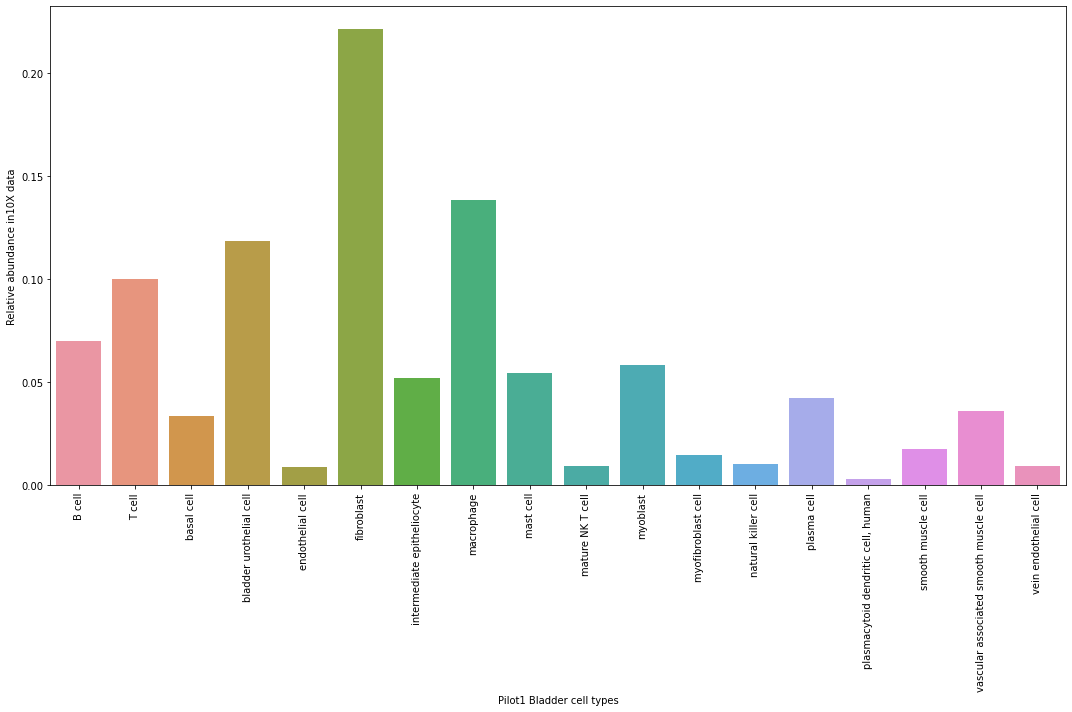

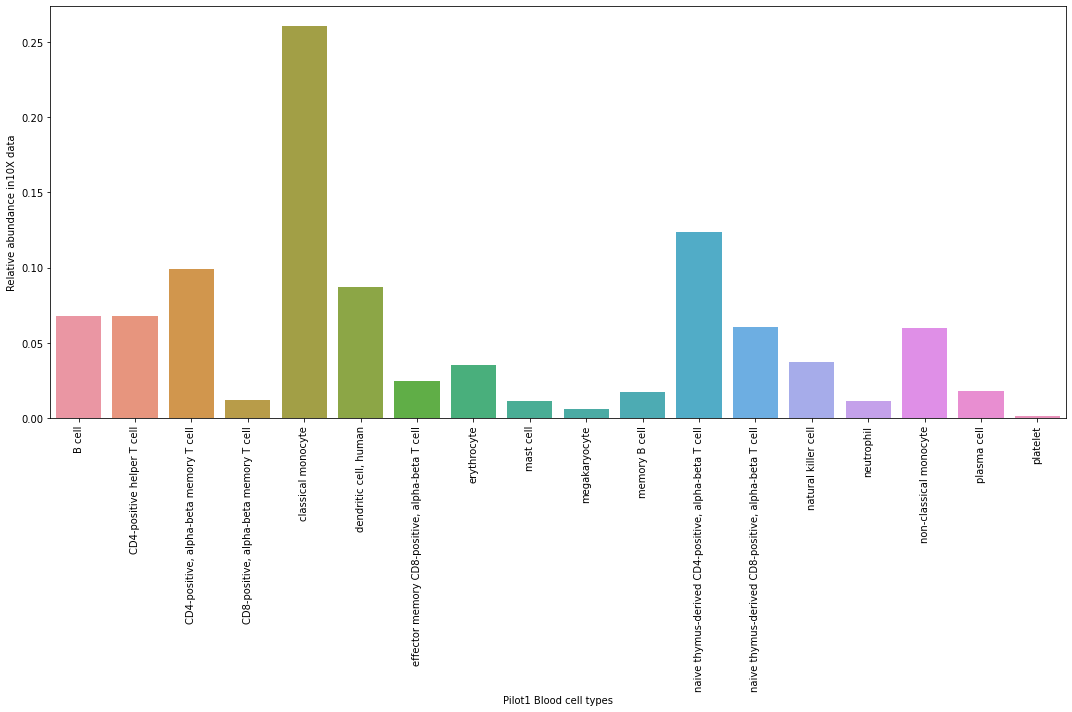

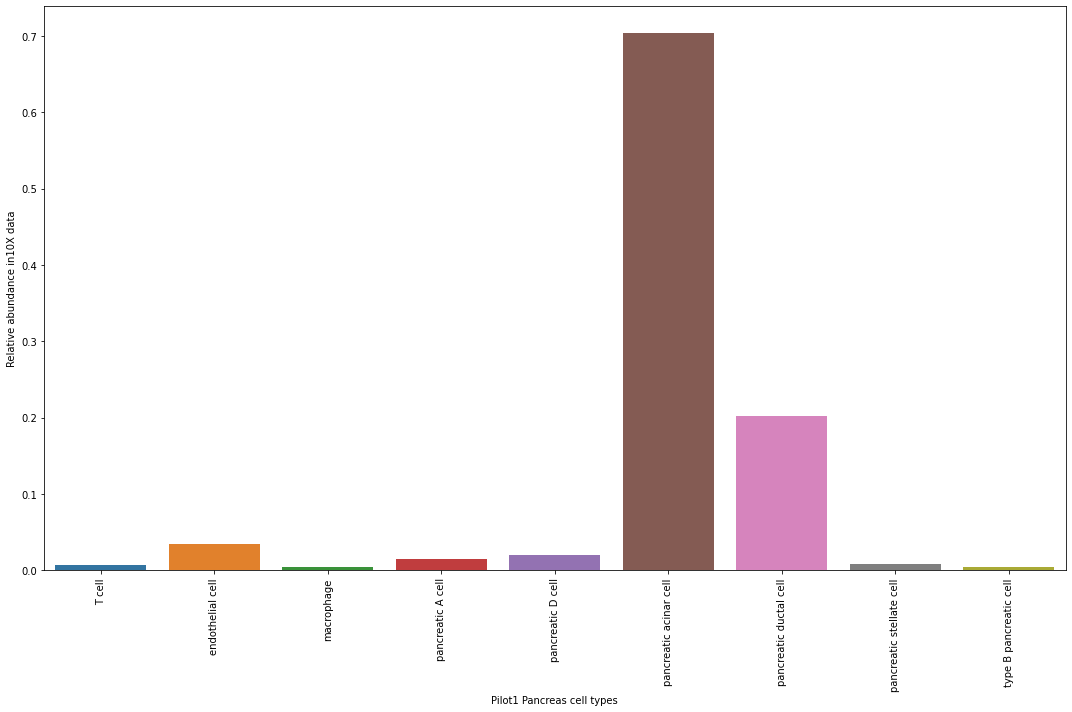

In [14]:
tiss_cell_fractions(adata[adata.obs['donor']=='TSP1'].copy(),
                        technology_col='method',
                        groupby='tissue',
                        category='propagated_cell_ontology_class',
                        dataset="Pilot1")

In [66]:
adata.obs.head()#.columns

,10X_run,smartseq2_barcode,smartseq2_library_plate,smartseq2_sorting_direction,smartseq2_sort_order,smartseq2_cDNA_Plate,cell_id,method,donor,10X_replicate,...,manual_cell_ontology_classcollapsed,Propagated Annotationcollapsed,Onclasscollapsed,singlecellNetcollapsed,kNNcollapsed,SVMcollapsed,scANVIcollapsed,miscompartmentalized,log_n_counts,log_n_genes
AAACCCAAGTTGTCGT_TSP1_blood_2,TSP1_blood_2,nan,nan,nan,nan,nan,AAACCCAAGTTGTCGT_TSP1_blood_2,10X,TSP1,2,...,unassigned,T cell,T cell,T cell,T cell,T cell,T cell,False,9.028579,7.628518
AAACGAAAGCCGTTAT_TSP1_blood_2,TSP1_blood_2,nan,nan,nan,nan,nan,AAACGAAAGCCGTTAT_TSP1_blood_2,10X,TSP1,2,...,unassigned,T cell,T cell,T cell,T cell,T cell,T cell,False,8.651199,7.521318
AAAGGATAGTGTTGTC_TSP1_blood_2,TSP1_blood_2,nan,nan,nan,nan,nan,AAAGGATAGTGTTGTC_TSP1_blood_2,10X,TSP1,2,...,unassigned,T cell,T cell,T cell,T cell,T cell,T cell,False,8.994669,7.699842
AAAGGGCAGGAACTAT_TSP1_blood_2,TSP1_blood_2,nan,nan,nan,nan,nan,AAAGGGCAGGAACTAT_TSP1_blood_2,10X,TSP1,2,...,unassigned,classical monocyte,classical monocyte,classical monocyte,classical monocyte,classical monocyte,classical monocyte,False,9.131947,7.930925
AAAGGGCCAACCAACT_TSP1_blood_2,TSP1_blood_2,nan,nan,nan,nan,nan,AAAGGGCCAACCAACT_TSP1_blood_2,10X,TSP1,2,...,unassigned,classical monocyte,classical monocyte,classical monocyte,classical monocyte,classical monocyte,classical monocyte,False,10.058095,8.454040


Muscle


KeyError: '10X'

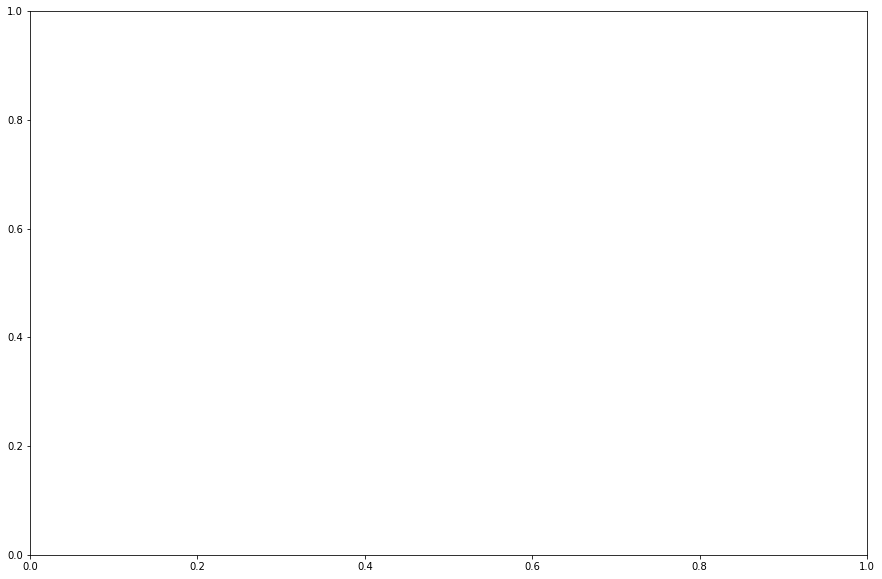

In [73]:
tiss_cell_fractions(adata,
                    technology_col='donor',
                    breakby='tissue',
                    category='Propagated Annotation',
                    dataset="Tabula Sapiens",groupby='method')

In [13]:
adata.obs.groupby(['tissue', 'propagated_cell_ontology_class', 'manual_cell_ontology_class'])

AnnData object with n_obs × n_vars = 203513 × 58870
    obs: '10X_run', 'smartseq2_barcode', 'smartseq2_library_plate', 'smartseq2_sorting_direction', 'smartseq2_sort_order', 'smartseq2_cDNA_Plate', 'cell_id', 'method', 'notes', 'donor', 'smartseq2_sorted_population', '10X_replicate', '10X_sample', 'sequencer', 'sex', 'anatomical_position', 'tissue', 'smartseq2_well_seq', '10X_barcode', 'n_counts', 'n_genes', 'batch', 'donor_tech_tissue', 'donor_tech', 'compartment', 'compartment_pred', 'propagated_cell_ontology_class', 'manual_cell_ontology_class'
    var: 'feature_types-0-0', 'n_cells-0-0', 'gene_symbol-0-0', 'n_cells-1-0', 'n_cells-0', 'feature_types-0-0-1', 'gene_symbol-0-0-1', 'n_cells-1-0-1', 'n_cells-1-1', 'n_cells', 'ensemble_id'
    uns: 'compartment_colors', 'compartment_pred_colors', 'donor_colors', 'donor_tech_colors', 'method_colors', 'neighbors', 'tissue_colors', 'umap'
    obsm: 'UMAP_donor_tech.100', 'UMAP_donor_tech.200', 'UMAP_donor_tech.50', 'X_scvi', 'X_scvi_donor_t

In [48]:
technology_col='method'
breakby='tissue'
category='propagated_cell_ontology_class'
dataset="Tabula Sapiens"
groupby='donor'

for m in set(adata.obs[technology_col]):
    adata_subset = adata[adata.obs[technology_col] == m].copy()
    adata_subset = remove_cats(adata_subset)
    for t in list(set(adata_subset.obs[breakby]))[3:4]:
        print(t)
        tiss = adata_subset[adata_subset.obs[breakby] == t].copy()
        tiss = remove_cats(tiss)

        aux = tiss.obs.groupby([category,groupby])['cell_id'].count()
        aux = pd.DataFrame(aux).reset_index()
        aux['fraction'] = aux['cell_id']/aux['cell_id'].sum()
        aux['cell_number'] = aux['cell_id']


Muscle
Muscle


In [49]:
aux

,propagated_cell_ontology_class,donor,cell_id,fraction,cell_number
0,B cell,TSP1,1,0.000052,1
1,B cell,TSP2,79,0.004120,79
2,"CD8-positive, alpha-beta T cell",TSP1,57,0.002973,57
3,"CD8-positive, alpha-beta T cell",TSP2,35,0.001825,35
4,T cell,TSP1,2,0.000104,2
5,T cell,TSP2,483,0.025189,483
6,capillary endothelial cell,TSP1,575,0.029987,575
7,capillary endothelial cell,TSP2,1694,0.088344,1694
8,endothelial cell of artery,TSP1,44,0.002295,44
9,endothelial cell of artery,TSP2,76,0.003963,76
